Extracting EDF parameters from c:\Users\Tejas\OneDrive\Desktop\IEEE Internship\siena data\PN00-1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


C:\Users\Tejas\AppData\Local\Temp\ipykernel_30160\2488294950.py:7: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\Tejas\AppData\Local\Temp\ipykernel_30160\2488294950.py:7: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_path, preload=True)
C:\Users\Tejas\AppData\Local\Temp\ipykernel_30160\2488294950.py:7: RuntimeWarning: Highpass cutoff frequency 15.91549 is greater than lowpass cutoff frequency 15.0, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(edf_path, preload=True)


Reading 0 ... 1343999  =      0.000 ...  2624.998 secs...
Using matplotlib as 2D backend.


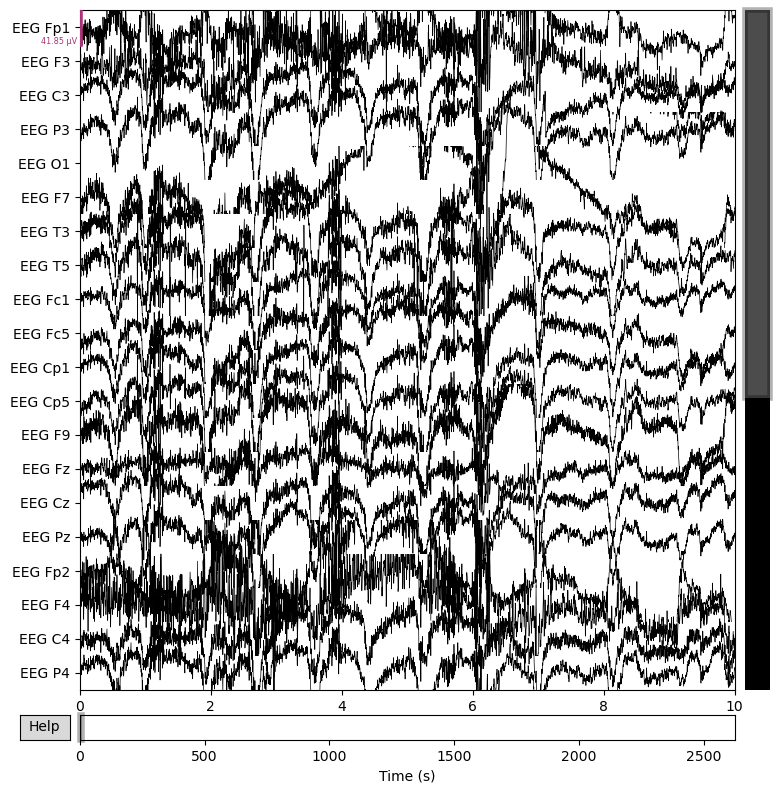

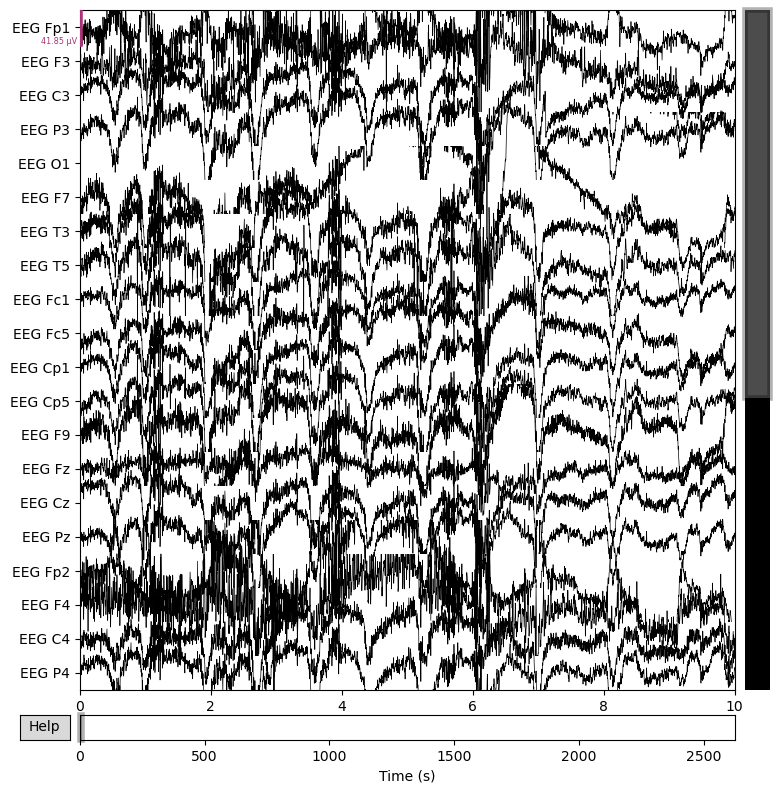

In [8]:
import mne

# Properly formatted Windows path
edf_path = r"siena data\PN00-1.edf"

# Load EEG
raw = mne.io.read_raw_edf(edf_path, preload=True)
raw.plot(n_channels=20, duration=10, scalings='auto')


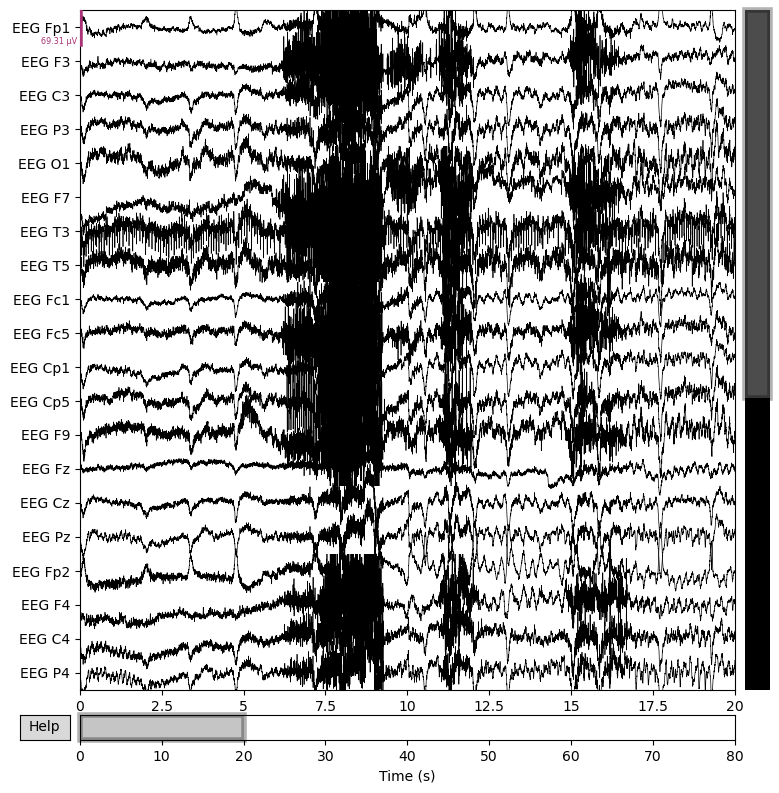

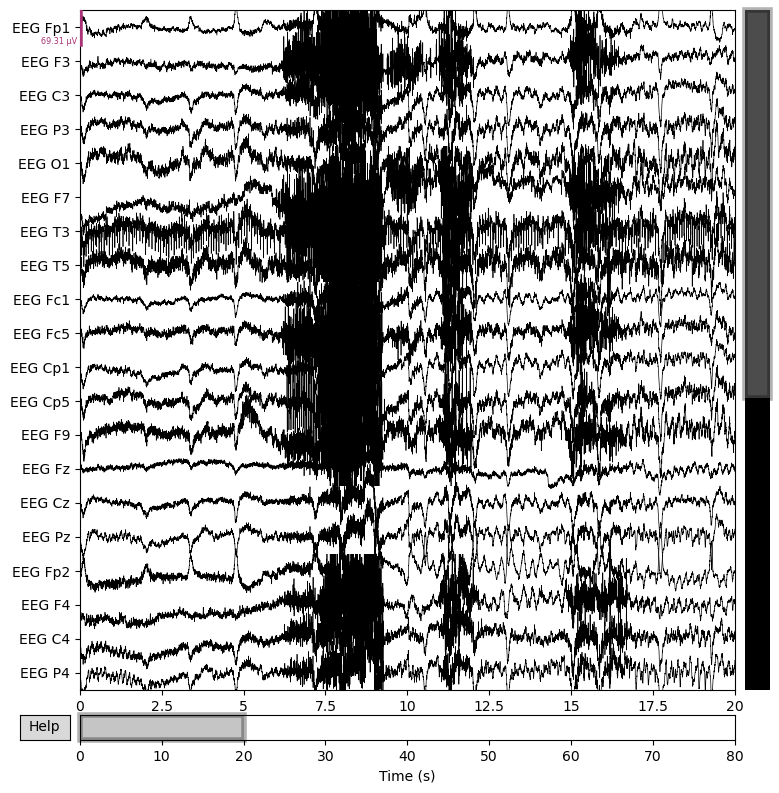

In [9]:
# Define seizure start/end in seconds (from recording start)
seizure_start = 1143
seizure_end = 1223

# Extract seizure segment
seizure_segment = raw.copy().crop(tmin=seizure_start, tmax=seizure_end)

# Plot 20 seconds of seizure EEG
seizure_segment.plot(n_channels=20, duration=20, scalings='auto', title="Seizure Segment (PN00-1)")


In [14]:
import numpy as np

# Parameters
window_size_sec = 5      # 5 seconds
overlap_sec = 2.5        # 50% overlap
sfreq = int(raw.info['sfreq'])
window_size = int(window_size_sec * sfreq)
stride = int((window_size_sec - overlap_sec) * sfreq)

# Full EEG data (shape: channels x time)
data, times = raw.get_data(return_times=True)

# Seizure interval (in seconds)
seizure_start_sec = 1143
seizure_end_sec = 1223

# Convert seizure to sample range
seizure_start_sample = seizure_start_sec * sfreq
seizure_end_sample = seizure_end_sec * sfreq

X = []
y = []

# Segment the entire signal
for start in range(0, data.shape[1] - window_size + 1, stride):
    end = start + window_size
    segment = data[:, start:end]  # shape: [channels, timepoints]
    
    # Label the window: 1 if any overlap with seizure
    label = int((seizure_start_sample < end) and (start < seizure_end_sample))
    
    X.append(segment)
    y.append(label)

X = np.stack(X)  # shape: [windows, channels, time]
y = np.array(y)

print("✅ Segmented EEG:")
print("X shape:", X.shape)
print("y shape:", y.shape)
print("Labels count:", np.bincount(y))  # shows number of 0s and 1s

# Save for model input
np.save("X_PN00-1.npy", X)
np.save("y_PN00-1.npy", y)


✅ Segmented EEG:
X shape: (1049, 35, 2560)
y shape: (1049,)
Labels count: [1015   34]
